<a href="https://colab.research.google.com/github/sreelekshmisaju/Fake-News-Detection-NLP/blob/main/Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install nltk

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
from google.colab import files
uploaded = files.upload()


Saving Fake.csv to Fake (1).csv
Saving True.csv to True (1).csv


In [4]:
fake_df = pd.read_csv('Fake.csv')
true_df = pd.read_csv('True.csv')


In [5]:
fake_df['label'] = 0  # Fake
true_df['label'] = 1  # Real

# Combine
data = pd.concat([fake_df, true_df], axis=0)
data = data[['title', 'text', 'label']]  # Keep only necessary columns
data = data.sample(frac=1).reset_index(drop=True)  # Shuffle


In [6]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

def clean_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

data['text_clean'] = data['text'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
X = data['text_clean']
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
vectorizer = TfidfVectorizer(max_df=0.7)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [9]:
model = PassiveAggressiveClassifier(max_iter=1000)
model.fit(X_train_vec, y_train)


PassiveAggressiveClassifier()

In [10]:
y_pred = model.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9966592427616926

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4692
           1       1.00      1.00      1.00      4288

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980


Confusion Matrix:
 [[4671   21]
 [   9 4279]]


In [13]:
y_pred = model.predict(X_test_vec)


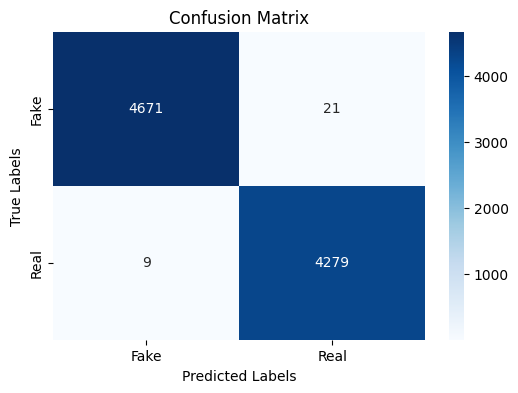

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Fake', 'Real']

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [11]:
def predict_news(text):
    clean = clean_text(text)
    vec = vectorizer.transform([clean])
    pred = model.predict(vec)
    return "Real" if pred[0] == 1 else "Fake"

# Example
predict_news("NASA confirms water on the moon surface.")


'Fake'